In [3]:
pd.set_option("display.max_columns", None)

In [4]:
sklearn.set_config(transform_output="pandas")

In [5]:
warnings.filterwarnings("ignore")

In [6]:
path =r"C:\Users\win\Desktop\flights_price_sagemaker\data\train.csv"
train = pd.read_csv(path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-05-06,Kolkata,Banglore,17:00:00,23:35:00,395,1.0,In-flight meal not included,10703
1,Vistara,2019-04-06,Banglore,Delhi,09:45:00,12:35:00,170,0.0,No Info,5613
2,Jet Airways,2019-03-06,Delhi,Cochin,11:30:00,04:25:00,1015,1.0,No Info,15764
3,Multiple Carriers,2019-06-12,Delhi,Cochin,14:00:00,01:30:00,690,1.0,No Info,13377
4,Indigo,2019-06-21,Chennai,Kolkata,11:35:00,14:00:00,145,0.0,No Info,3858
...,...,...,...,...,...,...,...,...,...,...
635,Spicejet,2019-05-01,Kolkata,Banglore,06:55:00,09:30:00,155,0.0,No check-in baggage included,3841
636,Air India,2019-03-18,Banglore,New Delhi,08:50:00,23:25:00,875,2.0,No Info,11728
637,Indigo,2019-05-18,Kolkata,Banglore,22:15:00,00:50:00,155,0.0,No Info,4804
638,Vistara,2019-06-21,Chennai,Kolkata,17:45:00,20:05:00,140,0.0,No Info,11982


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          640 non-null    object 
 1   date_of_journey  640 non-null    object 
 2   source           640 non-null    object 
 3   destination      640 non-null    object 
 4   dep_time         640 non-null    object 
 5   arrival_time     640 non-null    object 
 6   duration         640 non-null    int64  
 7   total_stops      640 non-null    float64
 8   additional_info  640 non-null    object 
 9   price            640 non-null    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 50.1+ KB


In [8]:
X_train = train.drop(columns="price")
y_train = train.price.copy()

In [9]:
X_train.airline

0            Jet Airways
1                Vistara
2            Jet Airways
3      Multiple Carriers
4                 Indigo
             ...        
635             Spicejet
636            Air India
637               Indigo
638              Vistara
639             Spicejet
Name: airline, Length: 640, dtype: object

In [10]:
air_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("grouper", RareLabelEncoder(tol=0.1, replace_with="Other",n_categories=2)),
    ("encoder",OneHotEncoder(sparse_output=False,handle_unknown="ignore"))
])
air_transformer.fit_transform(X_train.loc[:,["airline"]])

,airline_Air India,airline_Indigo,airline_Jet Airways,airline_Multiple Carriers,airline_Other
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
635,0.0,0.0,0.0,0.0,1.0
636,1.0,0.0,0.0,0.0,0.0
637,0.0,1.0,0.0,0.0,0.0
638,0.0,0.0,0.0,0.0,1.0


In [49]:
feature_to_extract = ["month", "week", "day_of_week", "day_of_year"]

doj_transformer = Pipeline(steps=[
	("dt", DatetimeFeatures(features_to_extract=feature_to_extract, yearfirst=True, format="mixed")),
	("scaler", MinMaxScaler())
])

doj_transformer.fit_transform(X_train.loc[:, ["date_of_journey"]])

,date_of_journey_month,date_of_journey_week,date_of_journey_day_of_week,date_of_journey_day_of_year
0,0.666667,0.588235,0.000000,0.559322
1,0.333333,0.294118,0.833333,0.305085
2,0.000000,0.058824,0.333333,0.042373
3,1.000000,0.882353,0.333333,0.872881
4,1.000000,0.941176,0.666667,0.949153
...,...,...,...,...
635,0.666667,0.529412,0.333333,0.516949
636,0.000000,0.176471,0.000000,0.144068
637,0.666667,0.647059,0.833333,0.661017
638,1.000000,0.941176,0.666667,0.949153


In [51]:
X_train.source

0       Kolkata
1      Banglore
2         Delhi
3         Delhi
4       Chennai
         ...   
635     Kolkata
636    Banglore
637     Kolkata
638     Chennai
639    Banglore
Name: source, Length: 640, dtype: object

In [53]:
X_train.destination

0       Banglore
1          Delhi
2         Cochin
3         Cochin
4        Kolkata
         ...    
635     Banglore
636    New Delhi
637     Banglore
638      Kolkata
639        Delhi
Name: destination, Length: 640, dtype: object

In [55]:
location_subset = X_train.loc[:, ["source", "destination"]]
location_subset

,source,destination
0,Kolkata,Banglore
1,Banglore,Delhi
2,Delhi,Cochin
3,Delhi,Cochin
4,Chennai,Kolkata
...,...,...
635,Kolkata,Banglore
636,Banglore,New Delhi
637,Kolkata,Banglore
638,Chennai,Kolkata


In [57]:
location_pipe1 = Pipeline(steps=[
	("grouper", RareLabelEncoder(tol=0.1, replace_with="Other", n_categories=2)),
	("encoder", MeanEncoder()),
	("scaler", PowerTransformer())
])

location_pipe1.fit_transform(location_subset, y_train)

,source,destination
0,-0.236189,-0.212380
1,-0.771000,-1.783482
2,1.069907,1.070124
3,1.069907,1.070124
4,-1.868558,-0.788146
...,...,...
635,-0.236189,-0.212380
636,-0.771000,-0.788146
637,-0.236189,-0.212380
638,-1.868558,-0.788146


In [59]:
np.union1d(
	X_train.source.unique(),
	X_train.destination.unique()
)

array(['Banglore', 'Chennai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'Mumbai', 'New Delhi'], dtype=object)

In [61]:
def is_north(X):
	columns = X.columns.to_list()
	north_cities = ["Delhi", "Kolkata", "Mumbai", "New Delhi"]
	return (
		X
		.assign(**{
			f"{col}_is_north": X.loc[:, col].isin(north_cities).astype(int)
			for col in columns
		})
		.drop(columns=columns)
	)


FunctionTransformer(func=is_north).fit_transform(location_subset)

,source_is_north,destination_is_north
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
635,1,0
636,0,1
637,1,0
638,0,1


In [63]:
location_transformer = FeatureUnion(transformer_list=[
	("part1", location_pipe1),
	("part2", FunctionTransformer(func=is_north))
])

location_transformer.fit_transform(location_subset, y_train)

,source,destination,source_is_north,destination_is_north
0,-0.236189,-0.212380,1,0
1,-0.771000,-1.783482,0,1
2,1.069907,1.070124,1,0
3,1.069907,1.070124,1,0
4,-1.868558,-0.788146,0,1
...,...,...,...,...
635,-0.236189,-0.212380,1,0
636,-0.771000,-0.788146,0,1
637,-0.236189,-0.212380,1,0
638,-1.868558,-0.788146,0,1


In [65]:
X_train.dep_time

0      17:00:00
1      09:45:00
2      11:30:00
3      14:00:00
4      11:35:00
         ...   
635    06:55:00
636    08:50:00
637    22:15:00
638    17:45:00
639    21:10:00
Name: dep_time, Length: 640, dtype: object

In [67]:
X_train.arrival_time

0      23:35:00
1      12:35:00
2      04:25:00
3      01:30:00
4      14:00:00
         ...   
635    09:30:00
636    23:25:00
637    00:50:00
638    20:05:00
639    00:05:00
Name: arrival_time, Length: 640, dtype: object

In [69]:
time_subset = X_train.loc[:, ["dep_time", "arrival_time"]]
time_subset

,dep_time,arrival_time
0,17:00:00,23:35:00
1,09:45:00,12:35:00
2,11:30:00,04:25:00
3,14:00:00,01:30:00
4,11:35:00,14:00:00
...,...,...
635,06:55:00,09:30:00
636,08:50:00,23:25:00
637,22:15:00,00:50:00
638,17:45:00,20:05:00


In [71]:
time_pipe1 = Pipeline(steps=[
	("dt", DatetimeFeatures(features_to_extract=["hour", "minute"])),
	("scaler", MinMaxScaler())
])

time_pipe1.fit_transform(time_subset)

,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute
0,0.739130,0.000000,1.000000,0.636364
1,0.391304,0.818182,0.521739,0.636364
2,0.478261,0.545455,0.173913,0.454545
3,0.608696,0.000000,0.043478,0.545455
4,0.478261,0.636364,0.608696,0.000000
...,...,...,...,...
635,0.260870,1.000000,0.391304,0.545455
636,0.347826,0.909091,1.000000,0.454545
637,0.956522,0.272727,0.000000,0.909091
638,0.739130,0.818182,0.869565,0.090909


In [73]:
def part_of_day(X, morning=4, noon=12, eve=16, night=20):
	columns = X.columns.to_list()
	X_temp = X.assign(**{
		col: pd.to_datetime(X.loc[:, col]).dt.hour
		for col in columns
	})

	return (
		X_temp
		.assign(**{
			f"{col}_part_of_day": np.select(
				[X_temp.loc[:, col].between(morning, noon, inclusive="left"),
				 X_temp.loc[:, col].between(noon, eve, inclusive="left"),
				 X_temp.loc[:, col].between(eve, night, inclusive="left")],
				["morning", "afternoon", "evening"],
				default="night"
			)
			for col in columns
		})
		.drop(columns=columns)
	)

FunctionTransformer(func=part_of_day).fit_transform(time_subset)

,dep_time_part_of_day,arrival_time_part_of_day
0,evening,night
1,morning,afternoon
2,morning,morning
3,afternoon,night
4,morning,afternoon
...,...,...
635,morning,morning
636,morning,night
637,night,night
638,evening,night


In [75]:
time_pipe2 = Pipeline(steps=[
	("part", FunctionTransformer(func=part_of_day)),
	("encoder", CountFrequencyEncoder()),
	("scaler", MinMaxScaler())
])

time_pipe2.fit_transform(time_subset)

,dep_time_part_of_day,arrival_time_part_of_day
0,0.216080,1.000000
1,1.000000,0.000000
2,1.000000,0.939024
3,0.000000,1.000000
4,1.000000,0.000000
...,...,...
635,1.000000,0.939024
636,1.000000,1.000000
637,0.211055,1.000000
638,0.216080,1.000000


In [77]:
time_transformer = FeatureUnion(transformer_list=[
	("part1", time_pipe1),
	("part2", time_pipe2)
])

time_transformer.fit_transform(time_subset)

,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute,dep_time_part_of_day,arrival_time_part_of_day
0,0.739130,0.000000,1.000000,0.636364,0.216080,1.000000
1,0.391304,0.818182,0.521739,0.636364,1.000000,0.000000
2,0.478261,0.545455,0.173913,0.454545,1.000000,0.939024
3,0.608696,0.000000,0.043478,0.545455,0.000000,1.000000
4,0.478261,0.636364,0.608696,0.000000,1.000000,0.000000
...,...,...,...,...,...,...
635,0.260870,1.000000,0.391304,0.545455,1.000000,0.939024
636,0.347826,0.909091,1.000000,0.454545,1.000000,1.000000
637,0.956522,0.272727,0.000000,0.909091,0.211055,1.000000
638,0.739130,0.818182,0.869565,0.090909,0.216080,1.000000


In [79]:
X_train.duration

0       395
1       170
2      1015
3       690
4       145
       ... 
635     155
636     875
637     155
638     140
639     175
Name: duration, Length: 640, dtype: int64

In [81]:
(
	X_train
	.duration
	.quantile([0.25, 0.5, 0.75])
	.values
	.reshape(-1, 1)
	# .shape
)

array([[170.],
       [455.],
       [930.]])

In [83]:
class RBFPercentileSimilarity(BaseEstimator, TransformerMixin):
	def __init__(self, variables=None, percentiles=[0.25, 0.5, 0.75], gamma=0.1):
		self.variables = variables
		self.percentiles = percentiles
		self.gamma = gamma


	def fit(self, X, y=None):
		if not self.variables:
			self.variables = X.select_dtypes(include="number").columns.to_list()

		self.reference_values_ = {
			col: (
				X
				.loc[:, col]
				.quantile(self.percentiles)
				.values
				.reshape(-1, 1)
			)
			for col in self.variables
		}

		return self


	def transform(self, X):
		objects = []
		for col in self.variables:
			columns = [f"{col}_rbf_{int(percentile * 100)}" for percentile in self.percentiles]
			obj = pd.DataFrame(
				data=rbf_kernel(X.loc[:, [col]], Y=self.reference_values_[col], gamma=self.gamma),
				columns=columns
			)
			objects.append(obj)
		return pd.concat(objects, axis=1)

In [85]:
RBFPercentileSimilarity(percentiles=[0.4, 0.8]).fit_transform(X_train)

,duration_rbf_40,duration_rbf_80,total_stops_rbf_40,total_stops_rbf_80
0,3.212193e-258,0.000000e+00,1.000000,1.000000
1,0.000000e+00,0.000000e+00,0.904837,0.904837
2,0.000000e+00,1.668157e-314,1.000000,1.000000
3,0.000000e+00,0.000000e+00,1.000000,1.000000
4,0.000000e+00,0.000000e+00,0.904837,0.904837
...,...,...,...,...
635,0.000000e+00,0.000000e+00,0.904837,0.904837
636,0.000000e+00,0.000000e+00,0.904837,0.904837
637,0.000000e+00,0.000000e+00,0.904837,0.904837
638,0.000000e+00,0.000000e+00,0.904837,0.904837


In [87]:
def duration_category(X, short=180, med=400):
	return (
		X
		.assign(duration_cat=np.select([X.duration.lt(short),
									    X.duration.between(short, med, inclusive="left")],
									   ["short", "medium"],
									   default="long"))
		.drop(columns="duration")
	)

In [89]:
def is_over(X, value=1000):
	return (
		X
		.assign(**{
			f"duration_over_{value}": X.duration.ge(value).astype(int)
		})
		.drop(columns="duration")
	)

In [91]:
duration_pipe1 = Pipeline(steps=[
	("rbf", RBFPercentileSimilarity()),
	("scaler", PowerTransformer())
])

duration_pipe2 = Pipeline(steps=[
	("cat", FunctionTransformer(func=duration_category)),
	("encoder", OrdinalEncoder(categories=[["short", "medium", "long"]]))
])

duration_union = FeatureUnion(transformer_list=[
	("part1", duration_pipe1),
	("part2", duration_pipe2),
	("part3", FunctionTransformer(func=is_over)),
	("part4", StandardScaler())
])

duration_transformer = Pipeline(steps=[
	("outliers", Winsorizer(capping_method="iqr", fold=1.5)),
	("imputer", SimpleImputer(strategy="median")),
	("union", duration_union)
])

duration_transformer.fit_transform(X_train.loc[:, ["duration"]])

,duration_rbf_25,duration_rbf_50,duration_rbf_75,duration_cat,duration_over_1000,duration
0,-0.366708,-0.11955,-0.106321,1.0,0,-0.443208
1,3.099018,-0.11955,-0.106321,0.0,0,-0.885647
2,-0.366708,-0.11955,-0.106321,2.0,1,0.775959
3,-0.366708,-0.11955,-0.106321,2.0,0,0.136880
4,-0.366708,-0.11955,-0.106321,0.0,0,-0.934807
...,...,...,...,...,...,...
635,-0.366708,-0.11955,-0.106321,0.0,0,-0.915143
636,-0.366708,-0.11955,-0.106321,2.0,0,0.500663
637,-0.366708,-0.11955,-0.106321,0.0,0,-0.915143
638,-0.366708,-0.11955,-0.106321,0.0,0,-0.944639


In [93]:
X_train.total_stops

0      1.0
1      0.0
2      1.0
3      1.0
4      0.0
      ... 
635    0.0
636    2.0
637    0.0
638    0.0
639    0.0
Name: total_stops, Length: 640, dtype: float64

In [95]:
def is_direct(X):
	return X.assign(is_direct_flight=X.total_stops.eq(0).astype(int))


total_stops_transformer = Pipeline(steps=[
	("imputer", SimpleImputer(strategy="most_frequent")),
	("", FunctionTransformer(func=is_direct))
])

total_stops_transformer.fit_transform(X_train.loc[:, ["total_stops"]])

,total_stops,is_direct_flight
0,1.0,0
1,0.0,1
2,1.0,0
3,1.0,0
4,0.0,1
...,...,...
635,0.0,1
636,2.0,0
637,0.0,1
638,0.0,1


In [97]:
X_train.additional_info

0       In-flight meal not included
1                           No Info
2                           No Info
3                           No Info
4                           No Info
                   ...             
635    No check-in baggage included
636                         No Info
637                         No Info
638                         No Info
639                         No Info
Name: additional_info, Length: 640, dtype: object

In [99]:
info_pipe1 = Pipeline(steps=[
	("group", RareLabelEncoder(tol=0.1, n_categories=2, replace_with="Other")),
	("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

info_pipe1.fit_transform(X_train.loc[:, ["additional_info"]])

,additional_info_In-flight meal not included,additional_info_No Info,additional_info_Other
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
635,0.0,0.0,1.0
636,0.0,1.0,0.0
637,0.0,1.0,0.0
638,0.0,1.0,0.0


In [101]:
def have_info(X):
	return X.assign(additional_info=X.additional_info.ne("No Info").astype(int))

In [103]:
info_union = FeatureUnion(transformer_list=[
	("part1", info_pipe1),
	("part2", FunctionTransformer(func=have_info))
])

In [105]:
info_transformer = Pipeline(steps=[
	("imputer", SimpleImputer(strategy="constant", fill_value="unknown")),
	("union", info_union)
])

info_transformer.fit_transform(X_train.loc[:, ["additional_info"]])

,additional_info_In-flight meal not included,additional_info_No Info,additional_info_Other,additional_info
0,1.0,0.0,0.0,1
1,0.0,1.0,0.0,0
2,0.0,1.0,0.0,0
3,0.0,1.0,0.0,0
4,0.0,1.0,0.0,0
...,...,...,...,...
635,0.0,0.0,1.0,1
636,0.0,1.0,0.0,0
637,0.0,1.0,0.0,0
638,0.0,1.0,0.0,0


In [107]:
column_transformer = ColumnTransformer(transformers=[
	("air", air_transformer, ["airline"]),
	("doj", doj_transformer, ["date_of_journey"]),
	("location", location_transformer, ["source", 'destination']),
	("time", time_transformer, ["dep_time", "arrival_time"]),
	("dur", duration_transformer, ["duration"]),
	("stops", total_stops_transformer, ["total_stops"]),
	("info", info_transformer, ["additional_info"])
], remainder="passthrough")

column_transformer.fit_transform(X_train, y_train)

,air__airline_Air India,air__airline_Indigo,air__airline_Jet Airways,air__airline_Multiple Carriers,air__airline_Other,doj__date_of_journey_month,doj__date_of_journey_week,doj__date_of_journey_day_of_week,doj__date_of_journey_day_of_year,location__source,location__destination,location__source_is_north,location__destination_is_north,time__dep_time_hour,time__dep_time_minute,time__arrival_time_hour,time__arrival_time_minute,time__dep_time_part_of_day,time__arrival_time_part_of_day,dur__duration_rbf_25,dur__duration_rbf_50,dur__duration_rbf_75,dur__duration_cat,dur__duration_over_1000,dur__duration,stops__total_stops,stops__is_direct_flight,info__additional_info_In-flight meal not included,info__additional_info_No Info,info__additional_info_Other,info__additional_info
0,0.0,0.0,1.0,0.0,0.0,0.666667,0.588235,0.000000,0.559322,-0.236189,-0.212380,1,0,0.739130,0.000000,1.000000,0.636364,0.216080,1.000000,-0.366708,-0.11955,-0.106321,1.0,0,-0.443208,1.0,0,1.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,1.0,0.333333,0.294118,0.833333,0.305085,-0.771000,-1.783482,0,1,0.391304,0.818182,0.521739,0.636364,1.000000,0.000000,3.099018,-0.11955,-0.106321,0.0,0,-0.885647,0.0,1,0.0,1.0,0.0,0
2,0.0,0.0,1.0,0.0,0.0,0.000000,0.058824,0.333333,0.042373,1.069907,1.070124,1,0,0.478261,0.545455,0.173913,0.454545,1.000000,0.939024,-0.366708,-0.11955,-0.106321,2.0,1,0.775959,1.0,0,0.0,1.0,0.0,0
3,0.0,0.0,0.0,1.0,0.0,1.000000,0.882353,0.333333,0.872881,1.069907,1.070124,1,0,0.608696,0.000000,0.043478,0.545455,0.000000,1.000000,-0.366708,-0.11955,-0.106321,2.0,0,0.136880,1.0,0,0.0,1.0,0.0,0
4,0.0,1.0,0.0,0.0,0.0,1.000000,0.941176,0.666667,0.949153,-1.868558,-0.788146,0,1,0.478261,0.636364,0.608696,0.000000,1.000000,0.000000,-0.366708,-0.11955,-0.106321,0.0,0,-0.934807,0.0,1,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.0,0.0,0.0,0.0,1.0,0.666667,0.529412,0.333333,0.516949,-0.236189,-0.212380,1,0,0.260870,1.000000,0.391304,0.545455,1.000000,0.939024,-0.366708,-0.11955,-0.106321,0.0,0,-0.915143,0.0,1,0.0,0.0,1.0,1
636,1.0,0.0,0.0,0.0,0.0,0.000000,0.176471,0.000000,0.144068,-0.771000,-0.788146,0,1,0.347826,0.909091,1.000000,0.454545,1.000000,1.000000,-0.366708,-0.11955,-0.106321,2.0,0,0.500663,2.0,0,0.0,1.0,0.0,0
637,0.0,1.0,0.0,0.0,0.0,0.666667,0.647059,0.833333,0.661017,-0.236189,-0.212380,1,0,0.956522,0.272727,0.000000,0.909091,0.211055,1.000000,-0.366708,-0.11955,-0.106321,0.0,0,-0.915143,0.0,1,0.0,1.0,0.0,0
638,0.0,0.0,0.0,0.0,1.0,1.000000,0.941176,0.666667,0.949153,-1.868558,-0.788146,0,1,0.739130,0.818182,0.869565,0.090909,0.216080,1.000000,-0.366708,-0.11955,-0.106321,0.0,0,-0.944639,0.0,1,0.0,1.0,0.0,0


In [109]:
estimator = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=42)

selector = SelectBySingleFeaturePerformance(
	estimator=estimator,
	scoring="r2",
	threshold=0.1
) 

In [111]:
preprocessor = Pipeline(steps=[
	("ct", column_transformer),
	("selector", selector)
])

preprocessor.fit_transform(X_train, y_train)

,air__airline_Jet Airways,doj__date_of_journey_week,doj__date_of_journey_day_of_year,location__source,dur__duration_cat,dur__duration_over_1000,stops__total_stops,stops__is_direct_flight
0,1.0,0.588235,0.559322,-0.236189,1.0,0,1.0,0
1,0.0,0.294118,0.305085,-0.771000,0.0,0,0.0,1
2,1.0,0.058824,0.042373,1.069907,2.0,1,1.0,0
3,0.0,0.882353,0.872881,1.069907,2.0,0,1.0,0
4,0.0,0.941176,0.949153,-1.868558,0.0,0,0.0,1
...,...,...,...,...,...,...,...,...
635,0.0,0.529412,0.516949,-0.236189,0.0,0,0.0,1
636,0.0,0.176471,0.144068,-0.771000,2.0,0,2.0,0
637,0.0,0.647059,0.661017,-0.236189,0.0,0,0.0,1
638,0.0,0.941176,0.949153,-1.868558,0.0,0,0.0,1


In [112]:
feature_performances = preprocessor.named_steps["selector"].feature_performance_
feature_performances

{'air__airline_Air India': -0.008601698991015002,
 'air__airline_Indigo': 0.09866800816665584,
 'air__airline_Jet Airways': 0.16772149753147203,
 'air__airline_Multiple Carriers': 0.013702865200387992,
 'air__airline_Other': 0.06665469851438943,
 'doj__date_of_journey_month': 0.05241445095432451,
 'doj__date_of_journey_week': 0.12232237747403633,
 'doj__date_of_journey_day_of_week': -0.02727075810989606,
 'doj__date_of_journey_day_of_year': 0.14285543628586728,
 'location__source': 0.12449453288343448,
 'location__destination': 0.08942858017226656,
 'location__source_is_north': 0.014881380445719664,
 'location__destination_is_north': 0.014881380445719664,
 'time__dep_time_hour': -0.014822033718828362,
 'time__dep_time_minute': -0.00467457367347357,
 'time__arrival_time_hour': 0.034411388153996546,
 'time__arrival_time_minute': 0.006757291732247299,
 'time__dep_time_part_of_day': -0.01006327614944232,
 'time__arrival_time_part_of_day': 0.027979975595584405,
 'dur__duration_rbf_25': 0.07

In [115]:
sorted_feat_imp = dict(sorted(feature_performances.items(), key=lambda val: val[1]))
sorted_feat_imp

{'dur__duration': -0.13351965217072037,
 'doj__date_of_journey_day_of_week': -0.02727075810989606,
 'info__additional_info_Other': -0.018105499842609046,
 'time__dep_time_hour': -0.014822033718828362,
 'info__additional_info_No Info': -0.010362683472005233,
 'info__additional_info': -0.010362683472005233,
 'time__dep_time_part_of_day': -0.01006327614944232,
 'dur__duration_rbf_50': -0.009613537397444749,
 'air__airline_Air India': -0.008601698991015002,
 'info__additional_info_In-flight meal not included': -0.005092391884055747,
 'time__dep_time_minute': -0.00467457367347357,
 'dur__duration_rbf_75': -0.0011242205725884673,
 'time__arrival_time_minute': 0.006757291732247299,
 'air__airline_Multiple Carriers': 0.013702865200387992,
 'location__source_is_north': 0.014881380445719664,
 'location__destination_is_north': 0.014881380445719664,
 'time__arrival_time_part_of_day': 0.027979975595584405,
 'time__arrival_time_hour': 0.034411388153996546,
 'doj__date_of_journey_month': 0.0524144509

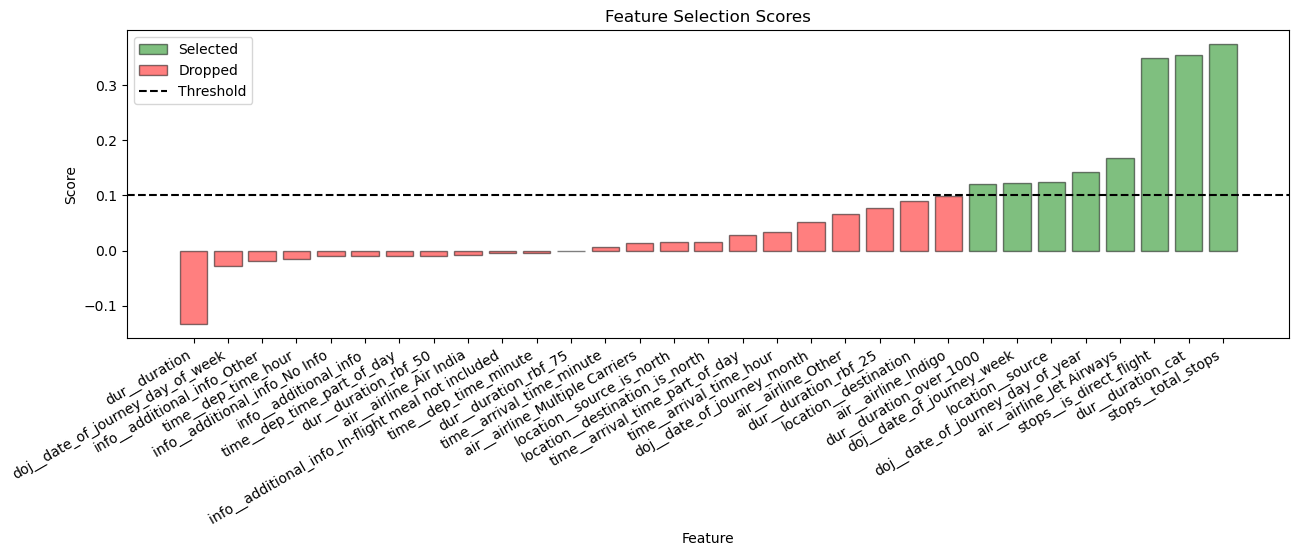

In [117]:
THRESHOLD = 0.1

selected_bar = None
dropped_bar = None
colors = ["red" if score < THRESHOLD else "green" for score in sorted_feat_imp.values()]


fig, ax = plt.subplots(figsize=(15, 4)) 

for i, (feature, score) in enumerate(sorted_feat_imp.items()):
	params = dict(
		x=i,
		height=score,
		edgecolor="black",
		alpha=0.5
	)
	
	if score < THRESHOLD:
		bar = ax.bar(
			color="red",
			**params
            )
		if not dropped_bar:
			dropped_bar = bar[0]
	else:
		bar = ax.bar(
			color="green",
			**params
		)
		if not selected_bar:
			selected_bar = bar[0]

thresh_line = ax.axhline(
	y=0.1,
	color="black",
	linestyle="--"
)

ax.set_xticks(
	ticks=range(len(sorted_feat_imp)),
	labels=list(sorted_feat_imp.keys()),
	rotation=30,
	ha="right"
)

ax.set(
	xlabel="Feature",
	ylabel="Score",
	title="Feature Selection Scores"
)
ax.legend(
	handles=[selected_bar, dropped_bar, thresh_line],
	labels=["Selected", "Dropped", "Threshold"],
	loc="upper left"
)

plt.show()